# Robotics and Machine Vision – Transforms Lab

Last edited by Nadejda Roubtsova for September - October  2023

This lab explores 2D matrix transformations for manipulating and animating shapes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In [2]:
## Make figures larger
plt.rcParams['figure.figsize'] = [10, 6]

## Try commenting this out if plots look blurry on your screen.
%config InlineBackend.figure_format = 'retina'

## 1. Basic transforms [15 marks]

Implement functions that return 3×3 homogeneous transformation matrices for scaling, translation and rotation.


**<font color='red'>For you to do:</font>**

**a) Implement uniform scaling about the origin [5 marks]**

**Solution**:

To implement the function `scaling` for uniform scaling about the origin, a 3×3 homogeneous transformation matrix need to be created. For uniform scaling, the matrix looks like this:

   $$
   S(x, y) = \begin{pmatrix}
   sx & 0 & 0 \\
   0 & sy & 0 \\
   0 & 0 & 1
   \end{pmatrix}
   $$

Where, $sx$ and $sy$ are the scaling factors along the x and y axes, respectively. Since the goal is to provide uniform scaling about the origin, $sx=xy$.

In [3]:
import numpy as np

def scaling(sx, sy=None):
    """
    Returns the scaling matrix for scaling by sx and sy.

    Parameters:
    sx (float): Scaling factor along the x-axis.
    sy (float): Scaling factor along the y-axis.

    Returns:
    numpy.ndarray: The 3x3 scaling matrix.
    """
    if sy is None:
        sy = sx

    return np.array([
        [sx, 0, 0],
        [0, sy, 0],
        [0, 0, 1]
    ])


# Test cases to check the implementation
print("Scaling by 0 should collapse any point to the origin [0, 0, 1].T:")
print(scaling(0) @ np.array([[1, 2, 1]]).T)
print()

print("Scaling [2, 3, 1].T by a factor of 3 should return [6, 9, 1].T:")
print(scaling(3) @ np.array([[2, 3, 1]]).T)
print()

print("Scaling [3, 4, 5].T by a factor of -2 should return [-6, -8, 5].T:")
print(scaling(-2) @ np.array([[3, 4, 5]]).T)
print()


Scaling by 0 should collapse any point to the origin [0, 0, 1].T:
[[0]
 [0]
 [1]]

Scaling [2, 3, 1].T by a factor of 3 should return [6, 9, 1].T:
[[6]
 [9]
 [1]]

Scaling [3, 4, 5].T by a factor of -2 should return [-6, -8, 5].T:
[[-6]
 [-8]
 [ 5]]



**<font color='red'>For you to do:</font>**

**b) Implement translation by a vector (x, y) [5 marks]**

**Solution**:

To implement the function `translation` for translating a point by a vector $(x, y)$, it is necessary to construct a 3×3 homogeneous transformation matrix. For translation, the matrix looks like this:

   $$
   T(x, y) = \begin{pmatrix}
   1 & 0 & tx \\
   0 & 1 & ty \\
   0 & 0 & 1
   \end{pmatrix}
   $$
   where, $tx$ and $ty$ are the translation distances along the $x$ and $y$ axes, respectively.




In [4]:
import numpy as np


def translation(point):
    """
    Returns the translation matrix for translating by tx and ty.

    Parameters:
    point (tuple): tx and ty

    Returns:
    numpy.ndarray: The 3x3 translation matrix.
    """
    return np.array([
        [1, 0, point[0]],
        [0, 1, point[1]],
        [0, 0, 1]
    ])

# Test cases to check the implementation
print("Translating the origin by [1, 2] should return [1, 2, 1].T:")
print(translation([1, 2]) @ np.array([[0, 0, 1]]).T)
print()

print("Translating [3, 4, 1].T by [2, 2] should return [5, 6, 1].T:")
print(translation([2, 2]) @ np.array([[3, 4, 1]]).T)
print()

print("Translating [3, 4, 1].T by [-7, 2] should return [-4, 6, 1].T:")
print(translation([-7, 2]) @ np.array([[3, 4, 1]]).T)
print()

Translating the origin by [1, 2] should return [1, 2, 1].T:
[[1]
 [2]
 [1]]

Translating [3, 4, 1].T by [2, 2] should return [5, 6, 1].T:
[[5]
 [6]
 [1]]

Translating [3, 4, 1].T by [-7, 2] should return [-4, 6, 1].T:
[[-4]
 [ 6]
 [ 1]]



**<font color='red'>For you to do:</font>**

**c) Implement rotation (anti-clockwise) [5 marks]**

To implement the function `rotation` for rotating a point anti-clockwise about the origin by a given angle in degrees, it is necessary to construct a 3×3 homogeneous transformation matrix. The matrix for rotation by an angle $\theta$ (in radians) is:

$$
\begin{pmatrix}
\cos \theta & -\sin \theta & 0 \\
\sin \theta & \cos \theta & 0 \\
0 & 0 & 1
\end{pmatrix}
$$

where, $\theta$ is the angle of rotation.

In [5]:
import numpy as np

def rotation(angle):
    """Returns a transform matrix for anti-clockwise rotation about the origin by 'angle' degrees.
    
    Parameters:
    theta (float): Rotation angle in degrees.

    Returns:
    numpy.ndarray: The 3x3 rotation matrix.
    """
    theta = np.radians(angle)
    return np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta), np.cos(theta), 0],
        [0, 0, 1]
    ])

# Test cases to check the implementation
print("Rotating [1, 2, 3].T by 0 degrees should return the same point:")
print(rotation(0) @ np.array([[1, 2, 3]]).T)
print()

print("Rotating [5, 7, 1].T anti-clockwise by 90 degrees should return [-7, 5, 1].T:")
print(rotation(90) @ np.array([[5, 7, 1]]).T)
print()

print("Rotating [2, 0, 1].T clockwise by 45 degrees should return [sqrt(2), -sqrt(2), 1].T:")
print(rotation(-45) @ np.array([[2, 0, 1]]).T)
print()

Rotating [1, 2, 3].T by 0 degrees should return the same point:
[[1.]
 [2.]
 [3.]]

Rotating [5, 7, 1].T anti-clockwise by 90 degrees should return [-7, 5, 1].T:
[[-7.]
 [ 5.]
 [ 1.]]

Rotating [2, 0, 1].T clockwise by 45 degrees should return [sqrt(2), -sqrt(2), 1].T:
[[ 1.41421356]
 [-1.41421356]
 [ 1.        ]]



## 2. Compound transforms [10 marks]
**<font color='red'>For you to do:</font>**

**a) Combine your scaling, translation and rotation transforms into a single compound transform [5 marks]**

Edit the following function to return a 3×3 homogeneous transform matrix that performs anti-clockwise rotation by angle `angle` (in degrees) and uniform scaling by `scale_factor` about the origin, followed by a translation of the origin to the given point `point = [x, y]`, using only your existing `scaling`, `translation` and `rotation` functions.

**Solution**:

To implement the compound transformation, it is necessary to combine the scaling, rotation, and translation transformations in a specific order. The combined transformation matrix can be obtained by multiplying the individual transformation matrices in the order of rotation, scaling, and then translation. In summary:

1. **Rotation**: Perform rotation by the given angle.
2. **Scaling**: Perform scaling by the given scale factor.
3. **Translation**: Translate the origin to the given point \([x, y]\).

The order of multiplication is important: first multiply the translation matrix by the scaling matrix, and then multiply the result by the rotation matrix.

In [6]:
import numpy as np

def rotation_scaling_and_translation(angle, scale_factor, point):
    """Returns a compound transform for rotating by 'angle', scaling by 'scale_factor',
    and translating by 'point'."""
    rot_matrix = rotation(angle)
    scale_matrix = scaling(scale_factor)
    trans_matrix = translation(point)
    
    # Combine transformations
    combined_matrix = trans_matrix @ scale_matrix @ rot_matrix
    return combined_matrix


## Some test cases to check your implementation.
print("Testing scaling only, should return [6, 4, 1].T:")
print(rotation_scaling_and_translation(0, 2, [0, 0]) @ np.array([[3, 2, 1]]).T)
print()

print("Testing rotation only, should return [-5, 4, 1].T:")
print(rotation_scaling_and_translation(90, 1, [0, 0]) @ np.array([[4, 5, 1]]).T)
print()

print("Testing translation only, should return [2, 3, 1].T:")
print(rotation_scaling_and_translation(0, 1, [1, -4]) @ np.array([[1, 7, 1]]).T)
print()

print("Complete test, should return [6, -0.5, 1].T:")
print(rotation_scaling_and_translation(-90, 1.25, [1, 2]) @ np.array([[2, 4, 1]]).T)

Testing scaling only, should return [6, 4, 1].T:
[[6.]
 [4.]
 [1.]]

Testing rotation only, should return [-5, 4, 1].T:
[[-5.]
 [ 4.]
 [ 1.]]

Testing translation only, should return [2, 3, 1].T:
[[2.]
 [3.]
 [1.]]

Complete test, should return [6, -0.5, 1].T:
[[ 6. ]
 [-0.5]
 [ 1. ]]


**Test your compound transformation by visualising it:**

The code in the next cell creates a little animation (click the play button after running the cell).

Read the code and ensure you understand how it works (with reference to your lecture notes).

If your implementation of `rotation_scaling_and_translation` is correct, you will see a blue square of length 3 units rotating about the red point.
Check that your code is general, so that modifying `point` makes the square rotate about the new point, and `scale_factor` affects the size of the blue square accordingly.

In [7]:
## A 2D polygon: a square of 2 by 2 units, in homogeneous coordinates.
## Each column in the matrix defines the coordinates of one corner of the square.
p = np.array([[-1,  1, 1, -1, -1],
              [-1, -1, 1,  1, -1],
              [ 1,  1, 1,  1,  1]])

## The square should eventually rotate about this point.
point = (2, 3)
scale_factor = 1.5

## Prepare a figure for animation.
fig, ax = plt.subplots()
ax.set_xlim((-2, 6))
ax.set_ylim((-2, 6))
ax.set_aspect('equal', adjustable='box')
line, = ax.plot([], [], 'b', linewidth=3)
ax.plot(point[0], point[1], 'r.', markersize=20)
plt.close(fig)  # don't show initial figure

def init():
    line.set_data([], [])
    return (line,)

def animate(step):
    ## Convert step=0..29 to theta=0..90ish for 90 degree rotation.
    angle = step * 3

    ## Apply the transformation.
    transform = rotation_scaling_and_translation(angle, scale_factor, point)
    pprime = transform @ p
    pprime /= pprime[2,:]

    ## Update coordinates of the polygon.
    line.set_data(pprime[0,:], pprime[1,:])
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=30, interval=33, blit=True)
HTML(anim.to_jshtml() if isinstance(fig.dpi, float) else "")  # skip animation when marking

**<font color='red'>For you to do:</font>**

**b) Create a compound transform to be used for post-multiplication [5 marks]**

Edit the following function to return a 3×3 homogeneous transform matrix that performs anti-clockwise rotation by angle `angle` (in degrees) and uniform scaling by `scale_factor` about the origin, followed by a translation of the origin to the given point `point = [x, y]`, using only your existing `scaling`, `translation` and `rotation` functions (and transposition), when pre-multiplied by a row vector.

**Hints:** 
Pre-multiplication by the compound transform involves column vectors representing points, whereas post-multiplication applies to the row vector format. The point representations are transposed relative to each other.

The pre-multiplication case mathematically is:

$\mathbf{p}' = \mathbf{A\,B\,C\,p}$, where $\mathbf{p}$ and $\mathbf{p}'$ are column vectors

Now, for this question, you want the row vector representation of $\mathbf{p}'^\top$. Use one of the properties of the *transpose* operator and the mathematical expression of pre-multiplication above to derive the one for post-multiplication.

**Solution**:

To implement the compound transformation for post-multiplication, it is necessary to transpose the matrix operations. In the previous case, the matrices were multiplied in the order $( T \cdot S \cdot R )$. For post-multiplication with row vectors, the order of multiplication needs to be reversed and transposed, as follows:

$$
\mathbf{p}'^\top = \mathbf{p}^\top \cdot (R \cdot S \cdot T)^\top 
$$

The transformation matrices for rotation, scaling, and translation remain the same, but we need to transpose them and multiply them in the reverse order.


In [8]:
import numpy as np

def rotation_scaling_and_translation_postmultiplied(angle, scale_factor, point):
    """Returns a post-multiplied compound transform for rotating by 'angle',
    scaling by 'scale_factor', and translating by 'point'."""
    rot_matrix = rotation(angle)
    scale_matrix = scaling(scale_factor)
    trans_matrix = translation(point)
    
    # Combine transformations in reverse order for post-multiplication
    combined_matrix = trans_matrix @ scale_matrix @ rot_matrix
    return combined_matrix.T

# Test cases to check the implementation
print("Testing scaling only, should return [6, 4, 1]:")
print(np.array([[3, 2, 1]]) @ rotation_scaling_and_translation_postmultiplied(0, 2, [0, 0]))
print()

print("Testing rotation only, should return [-5, 4, 1]:")
print(np.array([[4, 5, 1]]) @ rotation_scaling_and_translation_postmultiplied(90, 1, [0, 0]))
print()

print("Testing translation only, should return [2, 3, 1]:")
print(np.array([[1, 7, 1]]) @ rotation_scaling_and_translation_postmultiplied(0, 1, [1, -4]))
print()

print("Complete test, should return [6, -0.5, 1]:")
print(np.array([[2, 4, 1]]) @ rotation_scaling_and_translation_postmultiplied(-90, 1.25, [1, 2]))
print()


Testing scaling only, should return [6, 4, 1]:
[[6. 4. 1.]]

Testing rotation only, should return [-5, 4, 1]:
[[-5.  4.  1.]]

Testing translation only, should return [2, 3, 1]:
[[2. 3. 1.]]

Complete test, should return [6, -0.5, 1]:
[[ 6.  -0.5  1. ]]



## 3. Articulated motion [15 marks]

Run the following cells to create an animation of a square moon (in black) orbiting a square earth (in blue).
It is an example of articulated motion.

In [9]:
def transform_earth(theta):
    """Rotates the Earth in the solar system."""
    return rotation(theta)

def transform_moon1(theta):
    """Rotates moon #1 at 5 units distance from earth."""
    return transform_earth(theta) @ translation([5, 0])

**<font color='red'>For you to do:</font>**

**a) Modify the cell below to add a new, second moon (in green) that orbits the earth.
This moon should be 3 units away from earth and rotate twice as fast as the first moon. [5 marks]**

**Solution:**

To add a second moon that orbits the Earth at a distance of 3 units and rotates twice as fast as the first moon, it is necessary to adjust the transformation for this second moon accordingly. This involves creating a rotation matrix for twice the angle and then translating it by 3 units.

In [10]:
def transform_moon2(theta):
    """Rotates moon #2 at 3 units distance from earth and twice as fast."""
    return transform_earth(theta * 2) @ translation([3, 0])

**<font color='red'>For you to do:</font>**

**b) Add a third moon (in red) that orbits the second (green) moon at 1 unit distance, twice per one full rotation of the green moon around the Earth.  [10 marks]**


In [11]:
def transform_moon3(theta):
    """Rotates moon #3 at 1 unit distance from moon #2 and twice per one full rotation of moon #2 around the Earth."""
    return transform_moon2(2 * theta) @ translation([1, 0])

**<font color='red'>To avoid confusion in parts (a) and (b) in question 3: </font>**

In this assignment, "rotation" is simply defined as one full circle around the centre of the square representing a cosmic body (you can think of them as points, rather tha squares). In other words, the orbiting square does not need to be facing the same side of the orbited square again for it to count as a single rotation. As a check of your solution you could verify that the red moon is in-between the green moon and the Earth at one quarter and three quarters of the animation cycle.

Only a simple animated motion is considered in this assignment: so, neither moon rotates about its axis.



**Check your transforms using the following animation:**

In [12]:
## 2D polygon for Earth: square of 2 by 2 units, in homogeneous coordinates.
earth = np.array([[-1, 1, 1, -1, -1], [-1, -1, 1, 1, -1], [1, 1, 1, 1, 1]])

## 2D polygons for the moons, made by scaling down the Earth polygon.
moon1 = scaling(0.3) @ earth
moon2 = scaling(0.2) @ earth
moon3 = scaling(0.1) @ earth

## Prepare a figure for animation.
fig, ax = plt.subplots(figsize=[8, 8])
ax.set_xlim((-6, 6))
ax.set_ylim((-6, 6))
ax.set_aspect('equal', adjustable='box')
earth_line, = ax.plot([], [], 'b', linewidth=2)
moon1_line, = ax.plot([], [], 'k', linewidth=2)
moon2_line, = ax.plot([], [], 'g', linewidth=2)
moon3_line, = ax.plot([], [], 'r', linewidth=2)
plt.close(fig)

def init_earth_and_moons():
    earth_line.set_data([], [])
    moon1_line.set_data([], [])
    moon2_line.set_data([], [])
    moon3_line.set_data([], [])
    return (earth_line, moon1_line, moon2_line, moon3_line)

def animate_earth_and_moons(step):
    ## Convert step=0..99 to theta=0..360(ish) for 360 degree rotation.
    theta = step / 100 * 360

    # Put the Earth and moons into the solar system.
    p_earth = transform_earth(theta) @ earth; p_earth /= p_earth[2,:]
    p_moon1 = transform_moon1(theta) @ moon1; p_moon1 /= p_moon1[2,:]
    p_moon2 = transform_moon2(theta) @ moon2; p_moon2 /= p_moon2[2,:]
    p_moon3 = transform_moon3(theta) @ moon3; p_moon3 /= p_moon3[2,:]

    ## Update coordinates of all polygons.
    earth_line.set_data(p_earth[0,:], p_earth[1,:])
    moon1_line.set_data(p_moon1[0,:], p_moon1[1,:])
    moon2_line.set_data(p_moon2[0,:], p_moon2[1,:])
    moon3_line.set_data(p_moon3[0,:], p_moon3[1,:])
    return (earth_line, moon1_line, moon2_line, moon3_line)

anim_earth_and_moons = animation.FuncAnimation(fig, animate_earth_and_moons,
                                               init_func=init_earth_and_moons,
                                               frames=100, interval=40, blit=True)
HTML(anim_earth_and_moons.to_jshtml() if isinstance(fig.dpi, float) else "")  # skip animation when marking

## 4. Estimating transforms [60 marks]

Run the following cell and go to the next cell.

In [13]:
## Apply transformations and draw the results -- DO NOT EDIT THIS CELL
def apply_and_draw_transforms():
    ## Start shape: a 2D polygon in the shape of an 'F'.
    p = np.array([[0, 0, 4, 4, 1, 1, 3, 3, 1, 1, 0],
                  [0, 5, 5, 4, 4, 3, 3, 2, 2, 0, 0], 
                  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], float)

    ## Apply the defined transforms to the input shape.
    p_a = np.array(T_a) @ p; p_a /= p_a[2, :]
    p_b = np.array(T_b) @ p; p_b /= p_b[2, :]
    p_c = np.array(T_c) @ p; p_c /= p_c[2, :]
    p_d = np.array(T_d) @ p; p_d /= p_d[2, :]
    p_e = np.array(T_e) @ p; p_e /= p_e[2, :]
    p_f = np.array(T_f) @ p; p_f /= p_f[2, :]
    p_g = np.array(T_g) @ p; p_g /= p_g[2, :]
    p_h = np.array(T_h) @ p; p_h /= p_h[2, :]

    ## Set up plot and axes.
    %config InlineBackend.figure_format = 'svg'
    plt.figure(figsize=(8, 8))
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlim(-1,15); plt.ylim(-1,15)

    ## Draw the transformed shapes.
    plt.plot(p_a[0,:], p_a[1,:], color=(0.6, 0.0, 0.0), linewidth=3)
    plt.plot(p_b[0,:], p_b[1,:], color=(0.0, 0.6, 0.0), linewidth=3)
    plt.plot(p_c[0,:], p_c[1,:], color=(0.0, 0.0, 0.6), linewidth=3)
    plt.plot(p_d[0,:], p_d[1,:], color=(0.0, 0.6, 0.6), linewidth=3)
    plt.plot(p_e[0,:], p_e[1,:], color=(0.6, 0.0, 0.6), linewidth=3)
    plt.plot(p_f[0,:], p_f[1,:], color=(0.6, 0.6, 0.0), linewidth=3)
    plt.plot(p_g[0,:], p_g[1,:], color=(0.6, 0.3, 0.0), linewidth=3)
    plt.plot(p_h[0,:], p_h[1,:], color=(0.3, 0.0, 0.0), linewidth=3)

    ## Initial shape and locations
    plt.text(0, -0.5, 'start shape'); plt.plot(p[0,:], p[1,:], 'k', linewidth=3)

    ## Target shapes (shown in dashed lines).
    plt.text( 5.4,  1.4, 'a'); plt.plot([5, 5, 9, 9, 6, 6, 8, 8, 6, 6, 5], [1, 6, 6, 5, 5, 4, 4, 3, 3, 1, 1], '--', color=(1, 0.6, 0.6))
    plt.text( 7.7,  0.2, 'b'); plt.plot([7, 7, 8.6, 8.6, 7.4, 7.4, 8.2, 8.2, 7.4, 7.4, 7], [0, 2, 2, 1.6, 1.6, 1.2, 1.2, 0.8, 0.8, 0, 0], '--', color=(0.6, 1.0, 0.6))
    plt.text(10.0,  1.9, 'c'); plt.plot([9.5, 9.5, 14.3, 14.3, 10.7, 10.7, 13.1, 13.1, 10.7, 10.7, 9.5], [1.5, 3.5, 3.5, 3.1, 3.1, 2.7, 2.7, 2.3, 2.3, 1.5, 1.5],'--',color=(0.6, 0.6, 1.0))
    plt.text( 0.5,  6.9, 'd'); plt.plot([0, 3.53553390593274, 6.36396103067893, 5.65685424949238, 3.53553390593274, 2.82842712474619, 4.24264068711929, 3.53553390593274, 2.12132034355964, 0.707106781186548, 0], [7, 10.5355339059327, 7.70710678118655, 7, 9.12132034355964, 8.4142135623731, 7, 6.29289321881345, 7.70710678118655, 6.29289321881345, 7],'--',color=(0.6, 1.0, 1.0))
    plt.text( 0.5, 10.5, 'e'); plt.plot([2, 0.232233047033631, 1.64644660940673, 2, 0.939339828220179, 1.29289321881345, 2, 2.35355339059327, 1.64644660940673, 2.35355339059327, 2], [10, 11.7677669529664, 13.1819805153395, 12.8284271247462, 11.7677669529664, 11.4142135623731, 12.1213203435596, 11.7677669529664, 11.0606601717798, 10.3535533905933, 10], '--', color=(1.0, 0.6, 1.0))
    plt.text( 3.9, 12.5, 'f'); plt.plot([4, 6.82842712474619, 5.69705627484771, 5.13137084989848, 5.97989898732233, 5.41421356237309, 4.84852813742386, 4.28284271247462, 4.84852813742386, 3.71715728752538, 4], [14, 11.1715728752538, 10.0402020253553, 10.6058874503046, 11.4544155877284, 12.0201010126777, 11.4544155877284, 12.0201010126777, 12.5857864376269, 13.7171572875254, 14], '--', color=(0.6, 1.0, 0.6))
    plt.text( 8.0,  9.5, 'g'); plt.plot([7.97487373415292, 9.97487373415292, 13.5748737341529, 13.1748737341529, 10.4748737341529, 10.0748737341529, 11.8748737341529, 11.4748737341529, 9.67487373415292, 8.87487373415292, 7.97487373415292], [8.02512626584708, 12.5251262658471, 14.1251262658471, 13.2251262658471, 12.0251262658471, 11.1251262658471, 11.9251262658471, 11.0251262658471, 10.2251262658471, 8.42512626584708, 8.02512626584708], '--', color=(1.0, 0.8, 0.6))
    plt.text(10.7,  5.5, 'h'); plt.plot([9.812, 10.1963302752294, 14.1855010660981, 13.4, 10.8298217179903, 10.6398305084746, 12.0611940298507, 11.7371879106439, 10.4931163954944, 10.2813455657492, 9.812], [5.649, 8.39266055045871, 7.79957356076759, 6.91607142857143, 7.39059967585089, 6.74435028248588, 6.44328358208955, 5.95532194480946, 6.24530663329161, 5.5249745158002, 5.649], '--', color=(0.8, 0.6, 1.0));

**<font color='red'>For you to do:</font>**

**Edit the transforms in the following code cell to align start shape "F" with dotted outlines (a-h)** 

Please note that the transforms need to be expressed **decomposed** into basic operators (basic transformations). You should both use the operators defined previously in the assingment (*translation*, *rotation* and *scaling*) and implement additional ones if applicable, depending on the nature of the overall transform.

**Hint:** with each outline, start by visually analysing the transformed shape's appearance to identify the type of the transformation. Correctly stating the transformation type for each outline in your submission may be rewarded with some minimal bonus points at marker's discretion even if you don't manage to find the transform itself to qualify for points under the marking criteria. So take a moment to note down the transformation type for each outline.

Finally, to receive credit you need to:

For **outlines a to f (inclusive)**, simply present the transform in the statements below, correctly decomposed into basic operators. Undecomposed or inexact transforms will receive no credit for these outlines.

For **outlines g and h**, the following parts of your answer will receive credit: 

* finding a working transform (decomposed or not) to match the shape **exactly** 
* a sensible decomposition of the transform into principled basic operators (even if the outline is matched imperfectly, but very closely) and 
* explanation and implementation of the method you used to **decompose** the transform

Please make use of markdown cells (with Latex maths rendering where applicable) for text and code cells for any supporting code. The assignment is not autograded, so feel free to create additional cells to present your solutions. Only very clearly presented explanations and implementations will be credited. In-code comments by themselves will **not** count as the decomposition method description, although can be used as support, to facilitate referencing from the methodology description to the implementation. Please be technical and to the point in your answer.

Further details on the marking including the exact breakdown of points can be found in a separate **marking criteria document** for this Lab.

You are not allowed to use any specialised libraries (e.g. OpenCV) that would trivialise transformation computation or decomposition. Generic linear algebra library functions used as tools to solve sub-tasks you define yourself in the process of transform computation and decomposition are fine.

The use of exact shape coordinates (at the start and transformed) is allowed.

### Solution - Analysis and reasoning outline

#### Given the shapes, it is necessary to first identify the transformations required to match each target outline.

1. **Solution outline for `a`**:
   - **Transformation Type**: Translation.
   - **Reasoning**: The shape is translated to the position $[5, 1]$.
   - **Transformation**:
     $$
     T_a = \text{translation}(5, 1)
     $$
     $$
     T_a = \begin{pmatrix}
     1 & 0 & 5 \\
     0 & 1 & 1 \\
     0 & 0 & 1
     \end{pmatrix}
     $$

In [14]:
T_a = translation([5, 1])
T_a

array([[1, 0, 5],
       [0, 1, 1],
       [0, 0, 1]])

2. **Solution outline for `b`**:
   - **Transformation Type**: Scaling and translation.
   - **Reasoning**: The shape is scaled down by a factor of 0.4 and translated to the position $[7, 0]$.
   - **Transformation**:
     $$
     T_b = \text{translation}(7, 0) \times \text{scaling}(0.4)
     $$
     $$
     T_b = \begin{pmatrix}
     1 & 0 & 7 \\
     0 & 1 & 0 \\
     0 & 0 & 1
     \end{pmatrix}
     \times
     \begin{pmatrix}
     0.4 & 0 & 0 \\
     0 & 0.4 & 0 \\
     0 & 0 & 1
     \end{pmatrix}
     $$

In [15]:
T_b = translation([7, 0]) @ scaling(0.4)
T_b


array([[0.4, 0. , 7. ],
       [0. , 0.4, 0. ],
       [0. , 0. , 1. ]])

3. **Solution outline for `c`**:
   - **Transformation Type**: Scaling and translation.
   - **Reasoning**: The shape is scaled up by 1.5 times and translated to the position $[10, 1.5]$.
   - **Transformation**:
     $$
     T_c = \text{translation}(10, 1.5) \times \text{scaling}(1.5)
     $$
     $$
     T_c = \begin{pmatrix}
     1 & 0 & 10 \\
     0 & 1 & 1.5 \\
     0 & 0 & 1
     \end{pmatrix}
     \times
     \begin{pmatrix}
     1.5 & 0 & 0 \\
     0 & 1.5 & 0 \\
     0 & 0 & 1
     \end{pmatrix}
     $$

In [16]:
T_c = translation([9.5, 1.5]) @ scaling(1.2, 0.4)
T_c

array([[1.2, 0. , 9.5],
       [0. , 0.4, 1.5],
       [0. , 0. , 1. ]])

4. **Solution outline for `d`**:
   - **Transformation Type**: Rotation and translation.
   - **Reasoning**: The shape is rotated by 45 degrees and translated to the position $[0, 7]$.
   - **Transformation**:
     $$
     T_d = \text{translation}(0, 7) \times \text{rotation}(45)
     $$
     $$
     T_d = \begin{pmatrix}
     1 & 0 & 0 \\
     0 & 1 & 7 \\
     0 & 0 & 1
     \end{pmatrix}
     \times
     \begin{pmatrix}
     \cos(45^\circ) & -\sin(45^\circ) & 0 \\
     \sin(45^\circ) & \cos(45^\circ) & 0 \\
     0 & 0 & 1
     \end{pmatrix}
     $$


In [17]:
T_d = translation([0, 7]) @ rotation(-45)
T_d

array([[ 0.70710678,  0.70710678,  0.        ],
       [-0.70710678,  0.70710678,  7.        ],
       [ 0.        ,  0.        ,  1.        ]])

5. **Solution outline for `e`**:
   - **Transformation Type**: Scaling, rotation, and translation.
   - **Reasoning**: The shape is scaled down by a factor of 0.5, rotated by 45 degrees, and translated to the position $[2, 10]$.
   - **Transformation**:
     $$
     T_e = \text{translation}(2, 10) \times \text{rotation}(45) \times \text{scaling}(0.5)
     $$
     $$
     T_e = \begin{pmatrix}
     1 & 0 & 2 \\
     0 & 1 & 10 \\
     0 & 0 & 1
     \end{pmatrix}
     \times
     \begin{pmatrix}
     \cos(45^\circ) & -\sin(45^\circ) & 0 \\
     \sin(45^\circ) & \cos(45^\circ) & 0 \\
     0 & 0 & 1
     \end{pmatrix}
     \times
     \begin{pmatrix}
     0.5 & 0 & 0 \\
     0 & 0.5 & 0 \\
     0 & 0 & 1
     \end{pmatrix}
     $$


In [18]:
T_e = translation([2, 10]) @ rotation(45) @ scaling(0.5)
T_e

array([[ 0.35355339, -0.35355339,  2.        ],
       [ 0.35355339,  0.35355339, 10.        ],
       [ 0.        ,  0.        ,  1.        ]])

6. **Solution outline for `f`**:
   - **Transformation Type**: Rotation, scaling, and translation.
   - **Reasoning**: The shape is rotated by -45 degrees, scaled down by a factor of 0.4 on x-axis and by 0.8 on y-axis, and then translated to the position $[4, 14]$.
   - **Transformation**:
     $$
     T_f = \text{translation}(4, 14) \times \text{rotation}(-45) \times \text{scaling}(0.5)
     $$
     $$
     T_f = \begin{pmatrix}
     1 & 0 & 4 \\
     0 & 1 & 14 \\
     0 & 0 & 1
     \end{pmatrix}
     \times
     \begin{pmatrix}
     \cos(-45^\circ) & -\sin(-45^\circ) & 0 \\
     \sin(-45^\circ) & \cos(-45^\circ) & 0 \\
     0 & 0 & 1
     \end{pmatrix}
     \times
     \begin{pmatrix}
     0.5 & 0 & 0 \\
     0 & 0.5 & 0 \\
     0 & 0 & 1
     \end{pmatrix}
     $$

In [19]:
T_f = translation([4, 14]) @ rotation(-135) @ scaling(0.4, 0.8)
T_f

array([[-0.28284271,  0.56568542,  4.        ],
       [-0.28284271, -0.56568542, 14.        ],
       [ 0.        ,  0.        ,  1.        ]])

#### Solving $ \mathbf{g} $ and $ \mathbf{h} $

For solving *g* and *h*, the following transformations are necessary (upon visual inspection): translation, rotation, scaling, shearing. Shearing is not defined yet, hence:

1. **Shearing**:
   - Shearing skews the shape along one or both axes.
   - Represented by the shear matrix:
     $$
     \mathbf{H}_{\text{shear}} = \begin{pmatrix} 1 & k_x & 0 \\ k_y & 1 & 0 \\ 0 & 0 & 1 \end{pmatrix}
     $$
   where $ k_x $ and $ k_y $ are the shear factors.

Furthermore, a projective transformation is required. It is defined as:

2. **Projective Transformation**:
   - Projective transformation maps points from one plane to another while preserving the collinearity of points.
   - Represented by the projective transformation matrix:
     $$
     \mathbf{H} = \begin{pmatrix} h_{11} & h_{12} & h_{13} \\ h_{21} & h_{22} & h_{23} \\ h_{31} & h_{32} & h_{33} \end{pmatrix}
     $$

#### Combining Transformations

1. **Constructing the Transformation Matrix**:
   - Given source points $ \mathbf{p} $ and target points $ \mathbf{q} $, construct the system of linear equations:
     $$
     \mathbf{A} \mathbf{h} = \mathbf{b}
     $$
   where $ \mathbf{A} $ is a matrix derived from the source points, and $ \mathbf{b} $ is a vector derived from the target points. Solving this system using least squares gives the parameters of the transformation matrix $ \mathbf{H} $.

2. **Decomposing the Transformation Matrix**:
   - The matrix $ \mathbf{H} $ can be decomposed into its constituent transformations:
     $$
     \mathbf{H} = \mathbf{T} \mathbf{R} \mathbf{S} \mathbf{H}_{\text{shear}}
     $$
   - Singular Value Decomposition (SVD) is used to separate the affine part of $ \mathbf{H} $ into rotation, scaling, and shear components.

3. **Applying the Transformation**:
   - Convert points to homogeneous coordinates:
     $$
     \mathbf{p}_{\text{hom}} = \begin{pmatrix} \mathbf{p} \\ 1 \end{pmatrix}
     $$
   - Apply the transformation matrix:
     $$
     \mathbf{q}_{\text{hom}} = \mathbf{H} \mathbf{p}_{\text{hom}}
     $$
   - Convert back to Cartesian coordinates:
     $$
     \mathbf{q} = \frac{\mathbf{q}_{\text{hom}}}{\mathbf{q}_{\text{hom}}[2]}
     $$

By systematically applying these transformations, we can precisely map the source shape $ \mathbf{p} $ to the target shape $ \mathbf{q} $ using the projective transformation matrix $ \mathbf{H} $.

7. **Solution outline for `g`**:

Given two sets of corresponding points, $ \mathbf{p} $ in the source image and $ \mathbf{q} $ in the target image, we aim to find the projective transformation matrix $ \mathbf{H} $ that maps $ \mathbf{p} $ to $ \mathbf{q} $.

##### Points Representation

Let the source points be:

$$
\mathbf{p} = \begin{pmatrix}
x_1 & x_2 & \ldots & x_n \\
y_1 & y_2 & \ldots & y_n
\end{pmatrix}
$$

and the target points be:

$$
\mathbf{q} = \begin{pmatrix}
u_1 & u_2 & \ldots & u_n \\
v_1 & v_2 & \ldots & v_n
\end{pmatrix}
$$

##### Projective Transformation Matrix

The projective transformation can be represented as a $ 3 \times 3 $ matrix $ \mathbf{H} $:

$$
\mathbf{H} = \begin{pmatrix}
h_{11} & h_{12} & h_{13} \\
h_{21} & h_{22} & h_{23} \\
h_{31} & h_{32} & h_{33}
\end{pmatrix}
$$

This matrix $ \mathbf{H} $ maps a point $ \mathbf{p_i} = (x_i, y_i, 1) $ to $ \mathbf{q_i} = (u_i, v_i, 1) $ in homogeneous coordinates.

$$
\mathbf{q_i} = \mathbf{H} \cdot \mathbf{p_i}
$$

Expanding this equation gives:

$$
\begin{pmatrix}
u_i \\
v_i \\
1
\end{pmatrix} = \begin{pmatrix}
h_{11} & h_{12} & h_{13} \\
h_{21} & h_{22} & h_{23} \\
h_{31} & h_{32} & h_{33}
\end{pmatrix} \begin{pmatrix}
x_i \\
y_i \\
1
\end{pmatrix}
$$

This can be written as:

$$
\begin{cases}
u_i = \frac{h_{11}x_i + h_{12}y_i + h_{13}}{h_{31}x_i + h_{32}y_i + h_{33}} \\
v_i = \frac{h_{21}x_i + h_{22}y_i + h_{23}}{h_{31}x_i + h_{32}y_i + h_{33}}
\end{cases}
$$

##### Formulating the Equations

To find the elements of $ \mathbf{H} $, we set up a system of linear equations. For each pair of points $ (x_i, y_i) $ and $ (u_i, v_i) $, we get two equations:

$$
\begin{cases}
x_i h_{11} + y_i h_{12} + h_{13} - u_i (x_i h_{31} + y_i h_{32} + h_{33}) = 0 \\
x_i h_{21} + y_i h_{22} + h_{23} - v_i (x_i h_{31} + y_i h_{32} + h_{33}) = 0
\end{cases}
$$

These equations can be rewritten as:

$$
\begin{cases}
x_i h_{11} + y_i h_{12} + h_{13} - u_i x_i h_{31} - u_i y_i h_{32} - u_i h_{33} = 0 \\
x_i h_{21} + y_i h_{22} + h_{23} - v_i x_i h_{31} - v_i y_i h_{32} - v_i h_{33} = 0
\end{cases}
$$

##### Constructing the Matrix Equation

We can express these equations in matrix form $ \mathbf{A} \mathbf{h} = \mathbf{b} $:

$$
\mathbf{A} = \begin{pmatrix}
x_1 & y_1 & 1 & 0 & 0 & 0 & -x_1 u_1 & -y_1 u_1 & -u_1 \\
0 & 0 & 0 & x_1 & y_1 & 1 & -x_1 v_1 & -y_1 v_1 & -v_1 \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
x_n & y_n & 1 & 0 & 0 & 0 & -x_n u_n & -y_n u_n & -u_n \\
0 & 0 & 0 & x_n & y_n & 1 & -x_n v_n & -y_n v_n & -v_n
\end{pmatrix}
$$

$$
\mathbf{h} = \begin{pmatrix}
h_{11} \\
h_{12} \\
h_{13} \\
h_{21} \\
h_{22} \\
h_{23} \\
h_{31} \\
h_{32} \\
h_{33}
\end{pmatrix}, \quad \mathbf{b} = \begin{pmatrix}
0 \\
0 \\
\vdots \\
0 \\
0
\end{pmatrix}
$$

##### Solving for $ \mathbf{h} $

Using least squares, we solve $ \mathbf{A} \mathbf{h} = \mathbf{b} $ to find the transformation parameters:

$$
\mathbf{h} = \mathbf{A}^\dagger \mathbf{b}
$$

where $ \mathbf{A}^\dagger $ is the pseudoinverse of $ \mathbf{A} $.

##### Applying the Transformation

Once $ \mathbf{H} $ is determined, we apply it to the original points:

$$
\mathbf{p'} = \mathbf{H} \mathbf{p}
$$

where $ \mathbf{p} $ is in homogeneous coordinates.

##### Extracting Transformation Components

From $ \mathbf{H} $, we can extract:
- **Affine Part**: $ \mathbf{A} = \mathbf{H}_{2 \times 2} $
- **Translation**: $ \mathbf{t} = \mathbf{H}_{2 \times 1} $
- **SVD Decomposition**: $ \mathbf{A} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^\top $
  - **Rotation Matrix**: $ \mathbf{R} = \mathbf{U} \mathbf{V}^\top $
  - **Scaling Factors**: $ \mathbf{\Sigma} $
  - **Shear Matrix**: $ \mathbf{V} $


**Applying this reasoning, we can implement the tranformation matrix for g and decompose it afterwards:**

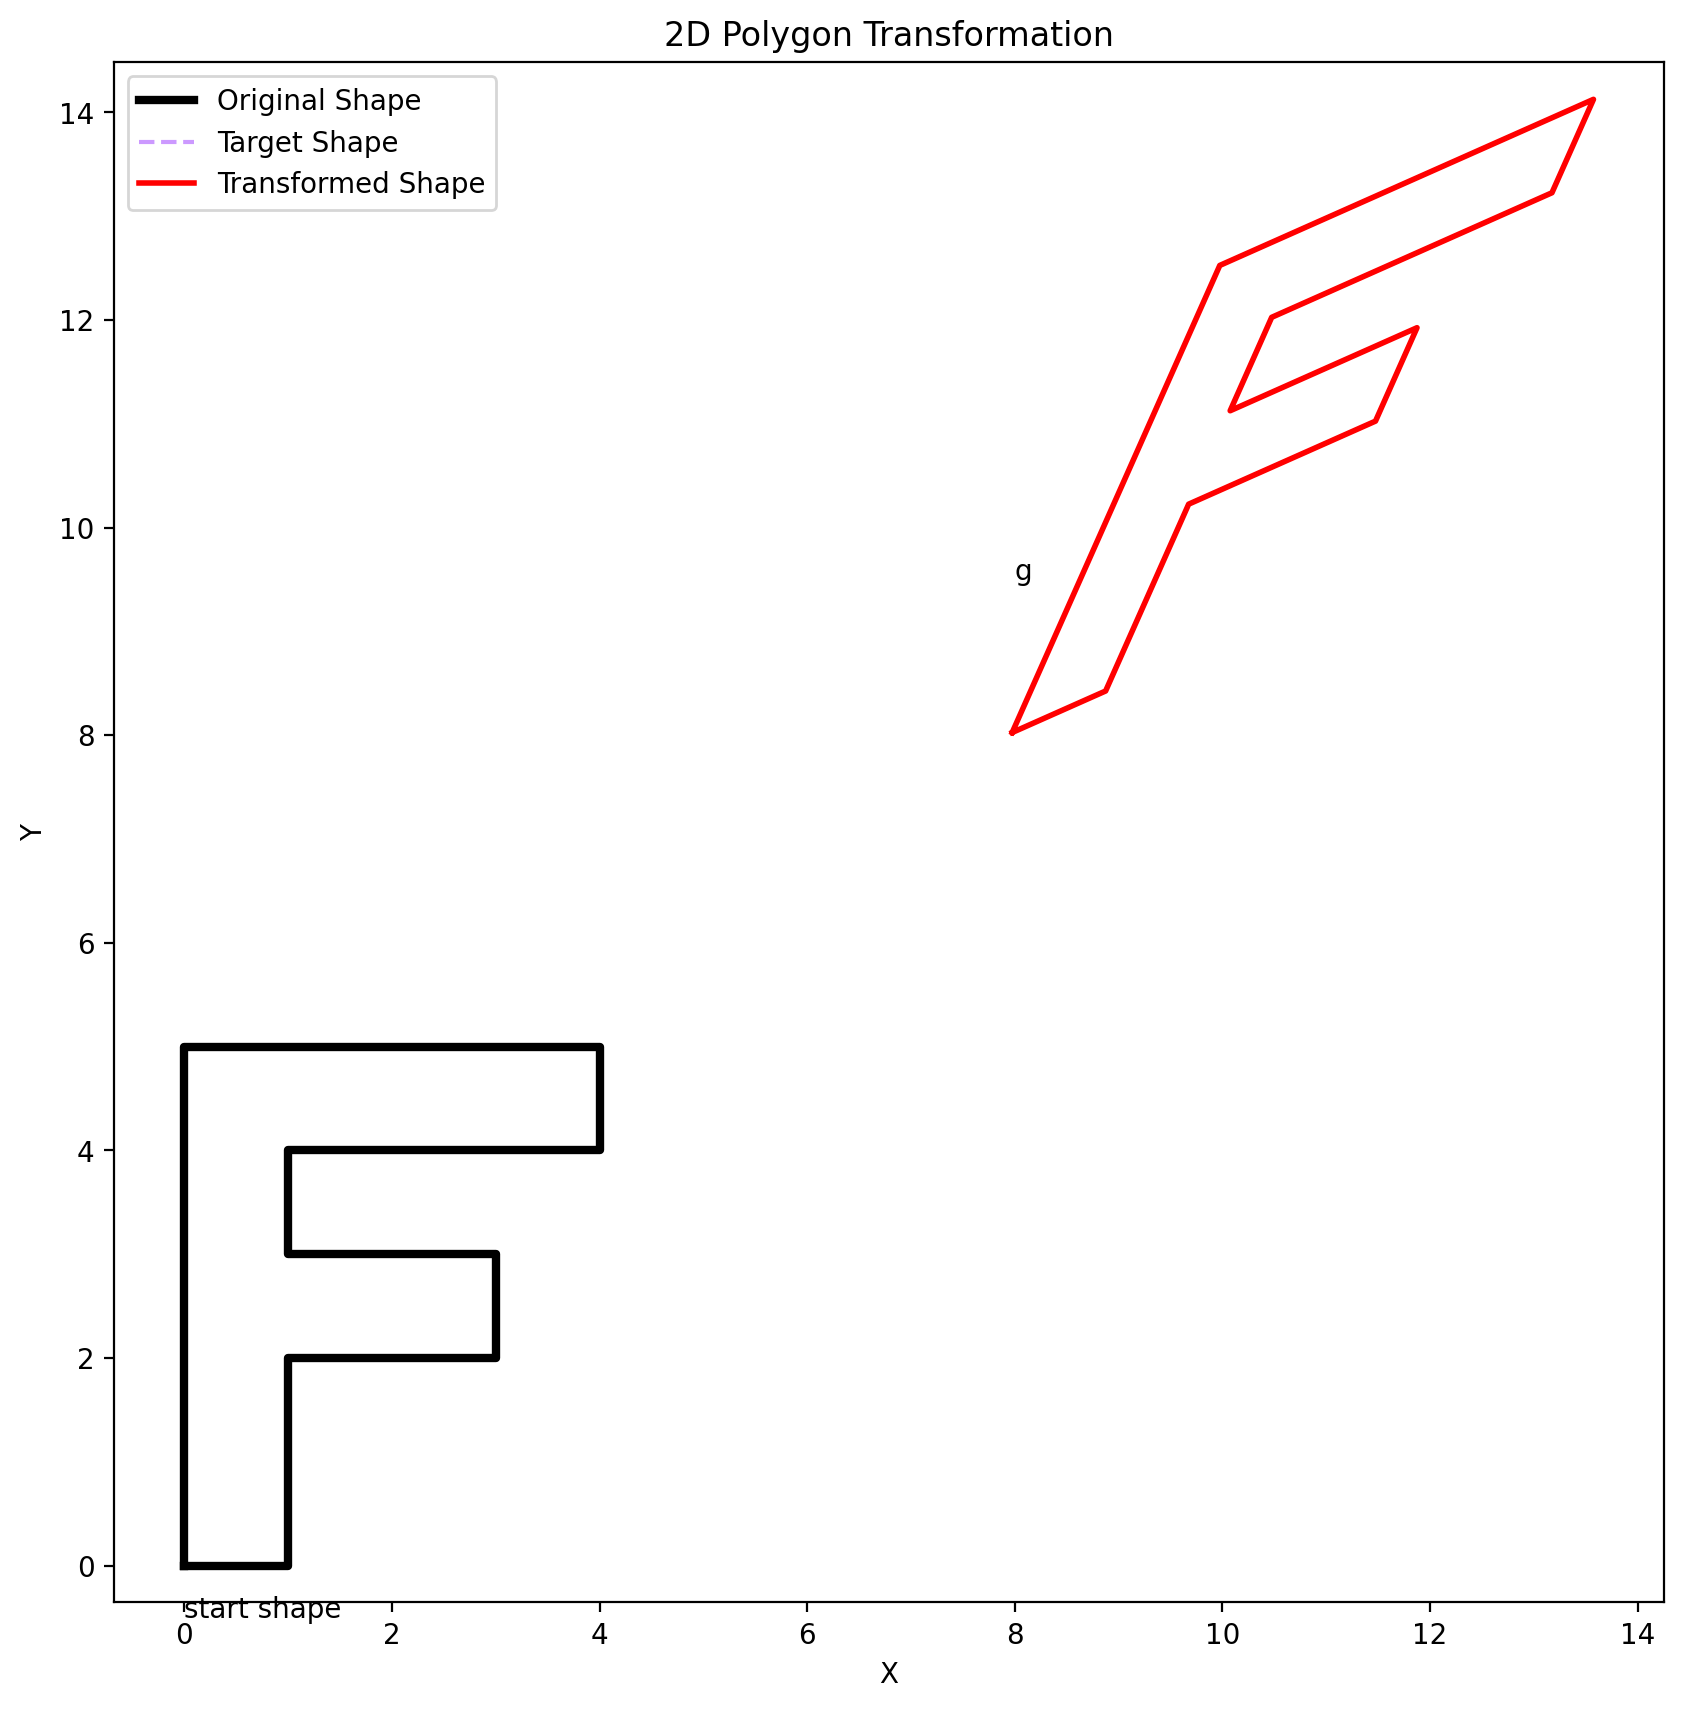

Transformation Matrix:
[[ 9.00000000e-01  4.00000000e-01  7.97487373e+00]
 [ 4.00000000e-01  9.00000000e-01  8.02512627e+00]
 [-8.69467756e-16  1.03917246e-15  1.00000000e+00]]

Translation:
[7.97487373 8.02512627]

Rotation Matrix:
[[ 1.00000000e+00  2.70951044e-15]
 [-2.75819778e-15  1.00000000e+00]]

Scaling Factors:
[1.3 0.5]

Shear Matrix:
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Define the original shape of the 'F'
p = np.array([[0, 0, 4, 4, 1, 1, 3, 3, 1, 1, 0],
              [0, 5, 5, 4, 4, 3, 3, 2, 2, 0, 0]], float)

# Define the target shape for g
target_x = [7.97487373415292, 9.97487373415292, 13.5748737341529, 13.1748737341529, 10.4748737341529, 10.0748737341529, 11.8748737341529, 11.4748737341529, 9.67487373415292, 8.87487373415292, 7.97487373415292]
target_y = [8.02512626584708, 12.5251262658471, 14.1251262658471, 13.2251262658471, 12.0251262658471, 11.1251262658471, 11.9251262658471, 11.0251262658471, 10.2251262658471, 8.42512626584708, 8.02512626584708]

# Convert to np arrays
target = np.vstack([target_x, target_y])

# Use least squares to estimate the projective transformation
src_points = p.T
dst_points = target.T

# Construct matrix A for the equation Ax = b, where x contains the transformation parameters
A = []
b = []
for i in range(len(src_points)):
    x, y = src_points[i][0], src_points[i][1]
    u, v = dst_points[i][0], dst_points[i][1]
    A.extend([
        [x, y, 1, 0, 0, 0, -x*u, -y*u],
        [0, 0, 0, x, y, 1, -x*v, -y*v]
    ])
    b.extend([u, v])

A = np.array(A)
b = np.array(b)

# Solve the equation Ax = b using least squares
params, _, _, _ = np.linalg.lstsq(A, b, rcond=None)
params = np.append(params, 1)  # Add the last parameter which is 1 for the projective transform matrix
tform_matrix = params.reshape(3, 3)

# Function to apply the transformation matrix to the points
def apply_transform(points, matrix):
    points_h = np.vstack([points, np.ones((1, points.shape[1]))])  # Convert to homogeneous coordinates
    transformed_points_h = matrix @ points_h
    transformed_points = transformed_points_h[:2, :] / transformed_points_h[2, :]  # Convert back to Cartesian coordinates
    return transformed_points

# Apply the transformation
transformed_points = apply_transform(p, tform_matrix)

# Plot the shapes
plt.figure(figsize=(10, 10))
plt.text(0, -0.5, 'start shape')
plt.plot(p[0, :], p[1, :], 'k', linewidth=3)
plt.text( 8.0,  9.5, 'g')
plt.plot(target_x, target_y, '--', color=(0.8, 0.6, 1.0))
plt.plot(transformed_points[0, :], transformed_points[1, :], 'r', linewidth=2)
plt.legend(['Original Shape', 'Target Shape', 'Transformed Shape'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Polygon Transformation')
plt.axis('equal')
plt.show()

print("Transformation Matrix:")
print(tform_matrix)

# Extract the affine part
affine_part = tform_matrix[:2, :2]
translation = tform_matrix[:2, 2]

# Perform SVD
U, S, Vt = np.linalg.svd(affine_part)

# Rotation matrix
rotation_matrix = U @ Vt

# Scaling factors
scaling_factors = S

# Shear matrix (upper triangular part of Vt)
shear_matrix = Vt

print("\nTranslation:")
print(translation)

print("\nRotation Matrix:")
print(rotation_matrix)

print("\nScaling Factors:")
print(scaling_factors)

print("\nShear Matrix:")
print(shear_matrix)

T_g = tform_matrix


8. **Solution outline for `h`**:

The same approach used for 'g' is applied to 'h'.

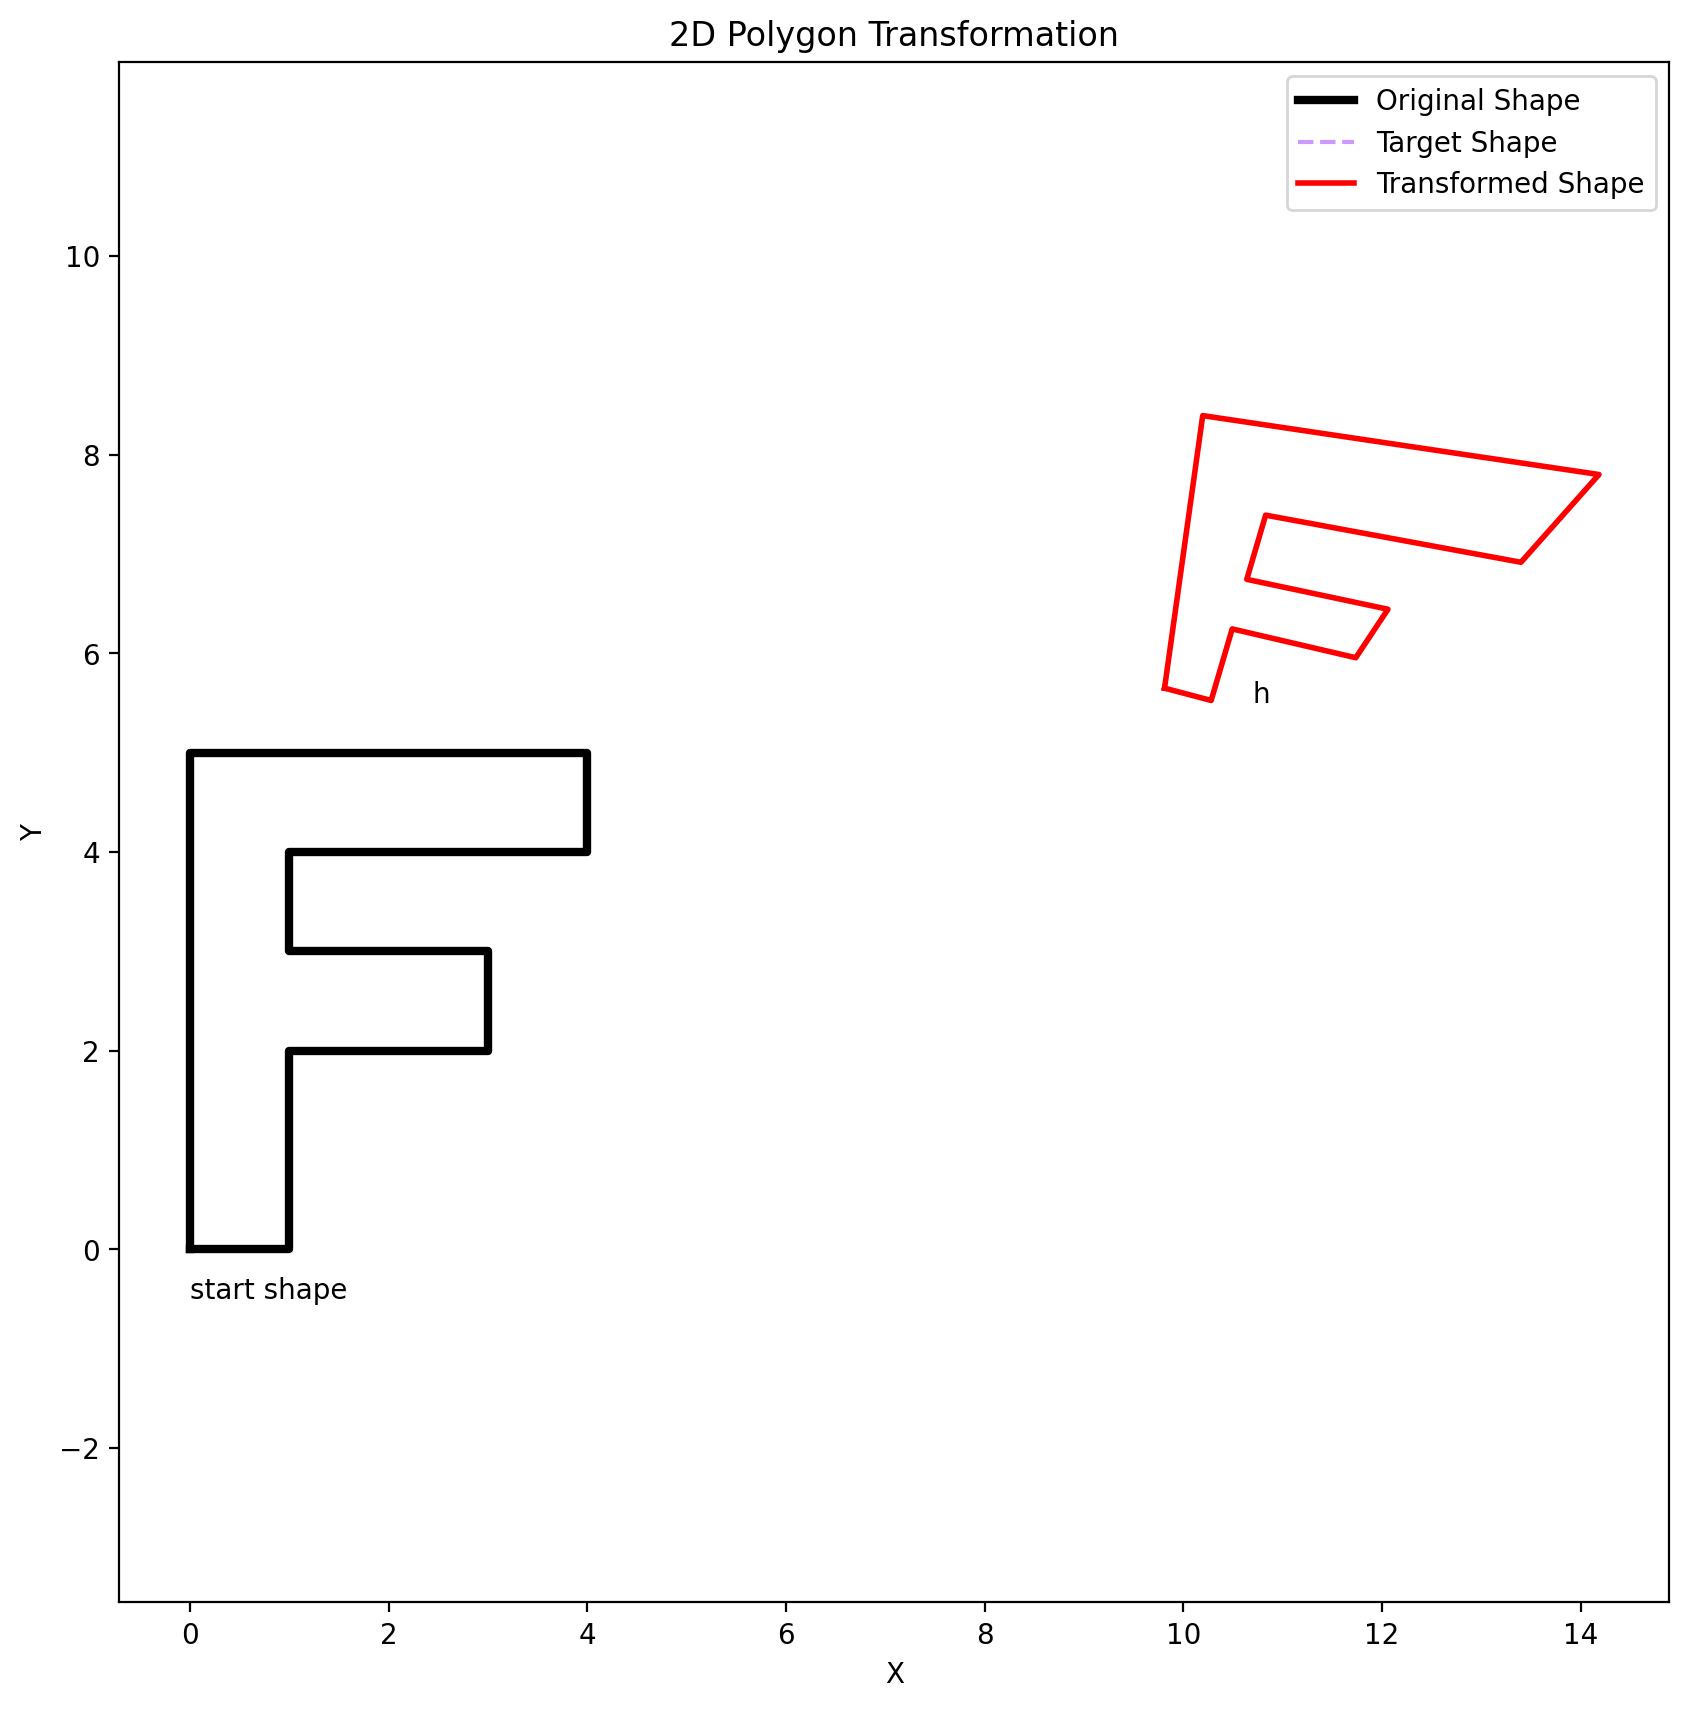

Transformation Matrix:
[[ 0.274 -0.851  9.812]
 [-0.229 -0.215  5.649]
 [-0.019 -0.091  1.   ]]

Translation:
[9.812 5.649]

Rotation Matrix:
[[ 0.41246793 -0.91097212]
 [-0.91097212 -0.41246793]]

Scaling Factors:
[0.90516934 0.28037737]

Shear Matrix:
[[ 0.25695196 -0.96642418]
 [ 0.96642418  0.25695196]]


In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Define the original shape of the 'F'
p = np.array([[0, 0, 4, 4, 1, 1, 3, 3, 1, 1, 0],
              [0, 5, 5, 4, 4, 3, 3, 2, 2, 0, 0]], float)

# Define the target shape for h
target_x = [9.812, 10.1963302752294, 14.1855010660981, 13.4, 10.8298217179903, 10.6398305084746, 12.0611940298507, 11.7371879106439, 10.4931163954944, 10.2813455657492, 9.812]
target_y = [5.649, 8.39266055045871, 7.79957356076759, 6.91607142857143, 7.39059967585089, 6.74435028248588, 6.44328358208955, 5.95532194480946, 6.24530663329161, 5.5249745158002, 5.649]

# Convert to np arrays
target = np.vstack([target_x, target_y])

# Use least squares to estimate the projective transformation
src_points = p.T
dst_points = target.T

# Construct matrix A for the equation Ax = b, where x contains the transformation parameters
A = []
b = []
for i in range(len(src_points)):
    x, y = src_points[i][0], src_points[i][1]
    u, v = dst_points[i][0], dst_points[i][1]
    A.extend([
        [x, y, 1, 0, 0, 0, -x*u, -y*u],
        [0, 0, 0, x, y, 1, -x*v, -y*v]
    ])
    b.extend([u, v])

A = np.array(A)
b = np.array(b)

# Solve the equation Ax = b using least squares
params, _, _, _ = np.linalg.lstsq(A, b, rcond=None)
params = np.append(params, 1)  # Add the last parameter which is 1 for the projective transform matrix
tform_matrix = params.reshape(3, 3)

# Function to apply the transformation matrix to the points
def apply_transform(points, matrix):
    points_h = np.vstack([points, np.ones((1, points.shape[1]))])  # Convert to homogeneous coordinates
    transformed_points_h = matrix @ points_h
    transformed_points = transformed_points_h[:2, :] / transformed_points_h[2, :]  # Convert back to Cartesian coordinates
    return transformed_points

# Apply the transformation
transformed_points = apply_transform(p, tform_matrix)

# Plot the shapes
plt.figure(figsize=(10, 10))
plt.text(0, -0.5, 'start shape')
plt.plot(p[0, :], p[1, :], 'k', linewidth=3)
plt.text(10.7, 5.5, 'h')
plt.plot(target_x, target_y, '--', color=(0.8, 0.6, 1.0))
plt.plot(transformed_points[0, :], transformed_points[1, :], 'r', linewidth=2)
plt.legend(['Original Shape', 'Target Shape', 'Transformed Shape'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Polygon Transformation')
plt.axis('equal')
plt.show()

print("Transformation Matrix:")
print(tform_matrix)

# Extract the affine part
affine_part = tform_matrix[:2, :2]
translation = tform_matrix[:2, 2]

# Perform SVD
U, S, Vt = np.linalg.svd(affine_part)

# Rotation matrix
rotation_matrix = U @ Vt

# Scaling factors
scaling_factors = S

# Shear matrix (upper triangular part of Vt)
shear_matrix = Vt

print("\nTranslation:")
print(translation)

print("\nRotation Matrix:")
print(rotation_matrix)

print("\nScaling Factors:")
print(scaling_factors)

print("\nShear Matrix:")
print(shear_matrix)

T_h = tform_matrix


Now, we can apply and draw the transforms using the `apply_and_draw_transforms` function and verify all the transformations.

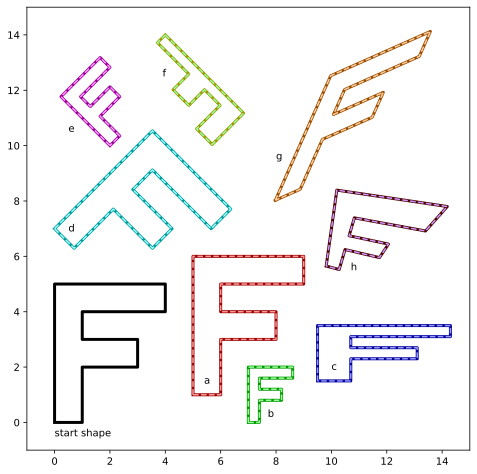

In [22]:
apply_and_draw_transforms()